Purpose of this notebook: 
* compute the offsets from the different summary stat methods

The files that are saved: 
* 'primary_peak_df.h5'
* 'spheric_proj_uber_df.h5'

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (10, 8)

In [119]:
from __future__ import print_function
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import compute_distance as compDist
import plot_cred_int as plotCI
import plot_clst_prop as plotclst
import get_KDE

In [6]:
data_path = "../../data/test_results/"

# read in files 

want to read in the second half of the projections for the DM data

In [31]:
clstNo = 43
date_stamps = ['06_17_16', '06_21_16']

main_FOF_h5 = h5py.File(
        "../../data/" +
        "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135" +
        ".hdf5", "r")
    
star_fhats0 = \
    h5py.File(data_path + 
              "stars_fhat_clst43_{}.h5".format(date_stamps[0])
             )

DM_fhats0 = \
    h5py.File(data_path + 
              "DM_fhat_clst43_{}.h5".format(date_stamps[0])
             )

DM_fhats1 = \
    h5py.File(data_path + 
              "DM_fhat_clst43_{}.h5".format(date_stamps[1])
             )
    
star_fhats1 = \
    h5py.File(data_path + 
              "stars_fhat_clst43_{}.h5".format(date_stamps[1])
             )
    


In [77]:
no_dens_fhats = h5py.File(
    "../../data/stars_fhat_clst_no_density_43_06_25_16.h5")

In [71]:
uber_df = pd.read_hdf('../../data/spheric_proj_uber_df.h5', 'df')

In [90]:
uber_gpby = uber_df.groupby(['peak_id', 'bin_width'])

In [94]:
uber_dom_peak_df = uber_gpby.get_group((0, 25))

In [95]:
no_dens_df = compDist.compute_dist_between_matched_DM_peak_and_no_dens_peak(
    no_dens_fhats, uber_dom_peak_df
)

In [103]:
no_dens_df = pd.DataFrame(no_dens_df)

In [114]:
no_dens_df.columns = [[u'Delta_no_peak_x', u'Delta_no_peak_y', 
                       u'no_dens_dist', u'no_dens_x', u'no_dens_y']]

In [106]:
uber_dom_peak_df.keys()

Index([u'BCG', u'Delta_x_BCG', u'Delta_x_centroid', u'Delta_x_shrink_cent', u'Delta_y_BCG', u'Delta_y_centroid', u'Delta_y_shrink_cent', u'centroid', u'shrink_cent', u'peak_id', u'KDE', u'Delta_x_KDE', u'Delta_y_KDE', u'matched_DM_peak_x', u'matched_DM_peak_y', u'total_peaks_dens', u'bin_width', u'gal_peak_no', u'projection', u'clstNo', u'no_dens_xcoord', u'no_dens_ycoord'], dtype='object')

In [70]:
# no_dens_df = pd.read_hdf('../../data/no_dens_dist_df.h5', 'df')

# compute the distance from the most bound particle

In [23]:
star_paths0 = compDist.retrieve_cluster_path(star_fhats0)
star_paths1 = compDist.retrieve_cluster_path(star_fhats1)

In [22]:
no_dens_paths = compDist.retrieve_cluster_path(star_no_dens_fhats)

In [ ]:
mbp_df0 = compDist.compute_distance_from_most_bound_particle(
    star_fhats0, DM_fhats0, star_paths=star_paths0
)

In [59]:
mbp_df1 = compDist.compute_distance_from_most_bound_particle(
    star_fhats1, DM_fhats1, star_paths=star_paths1
)

In [131]:
mbp_df = pd.concat([mbp_df0, mbp_df1])

In [132]:
mbp_df.keys()

Index([u'BCG_x', u'BCG_y', u'centroid_x', u'centroid_y', u'clstNo', u'lum_KDE_x', u'lum_KDE_y', u'projection', u'shrink_cent_x', u'shrink_cent_y'], dtype='object')

In [134]:
mbp_df.index = no_dens_df.index

In [135]:
mbp_df = pd.concat(
    [mbp_df, 
     no_dens_df[['no_dens_x', 'no_dens_y']]], 
    axis=1)

In [122]:
center_keys = ['BCG', 'shrink_cent', 'no_dens', 'centroid', 'lum_KDE']

In [136]:
mbp_df.describe()

,BCG_x,BCG_y,centroid_x,centroid_y,clstNo,lum_KDE_x,lum_KDE_y,shrink_cent_x,shrink_cent_y,no_dens_x,no_dens_y
count,3.302400e+04,33024.000000,33024.000000,3.302400e+04,33024.000000,33024.000000,33024.000000,33024.000000,3.302400e+04,33024.000000,33024.000000
mean,-1.677630e-11,22.438117,-8.726255,1.598332e-10,22.279070,10.136077,-0.006766,8.301758,6.687375e-11,4.275660,-0.060711
std,1.777266e+02,155.107924,210.889070,2.562512e+02,14.474455,150.195593,186.771610,160.858684,1.934533e+02,165.618512,207.567497
min,-1.639356e+03,-1390.923245,-1963.999385,-2.053919e+03,0.000000,-1961.808379,-2098.123557,-2175.267763,-2.631011e+03,-1968.336250,-2050.541877
25%,0.000000e+00,0.000000,-107.873312,-8.126421e+01,10.000000,-11.877517,-11.538105,-25.604759,-2.429784e+01,-49.305411,-53.675518
50%,0.000000e+00,0.000000,-20.138227,-5.240335e-10,21.000000,-0.926064,-0.003626,-0.797230,1.676314e-10,0.223063,-0.016868
75%,0.000000e+00,0.000000,64.956372,8.126421e+01,33.000000,10.494662,11.516453,20.812257,2.429784e+01,58.611494,53.641968
max,1.639356e+03,1639.834900,1861.732831,2.053919e+03,58.000000,1773.917559,2098.123557,1756.465612,2.631011e+03,1773.917303,2050.541818


# get cluster number for which the BCG doesn't overlap with the most bound particle

In [154]:
np.unique(mbp_df[mbp_df['BCG_x'] > 0]['clstNo'])

array([13, 33])

# visualize the offsets from the most bound particle

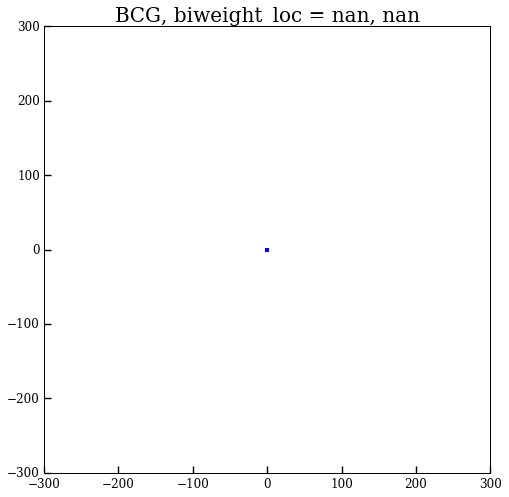

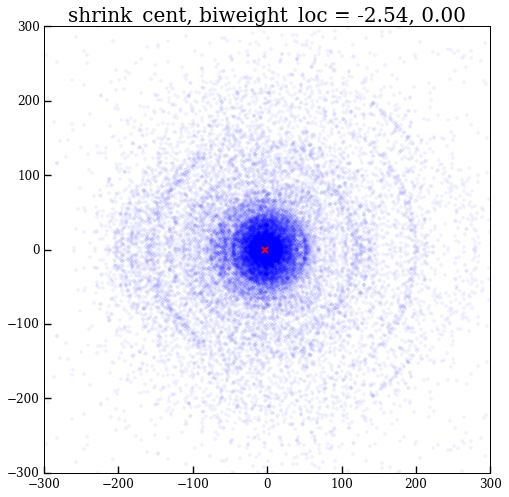

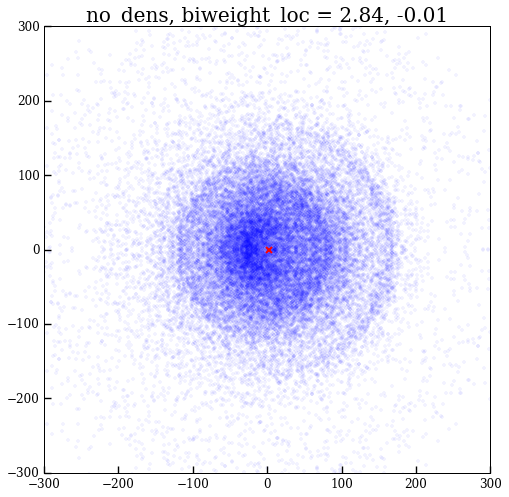

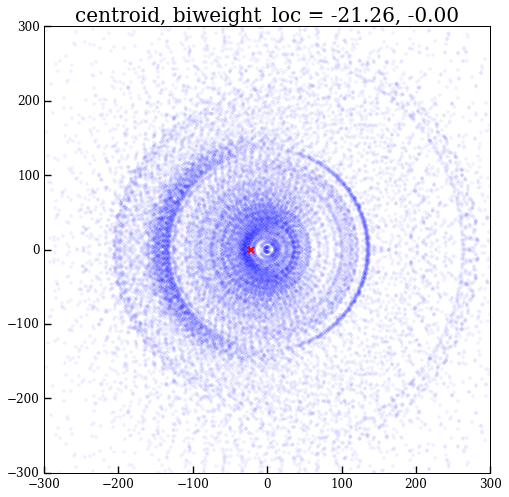

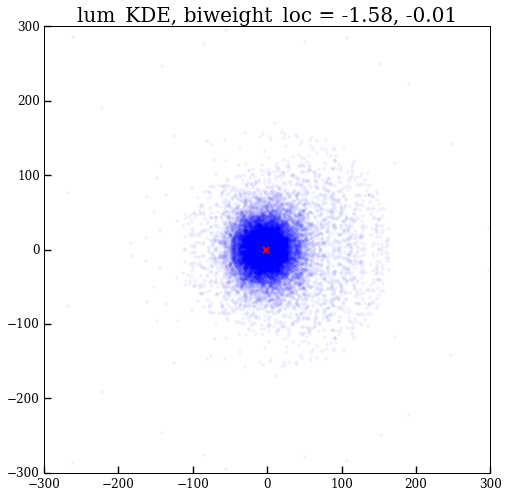

In [124]:
plotclst.plot_2D_offsets(mbp_df, center_keys, 
                         prefix_bool=0)

There is no significant deviation of BCG from the most bound particle

In [139]:
one_D_stat_keys = {key + "_y": r"$\Delta y_{\rm " + key + "}$" 
                   for key in center_keys}

In [142]:
one_D_stat_keys['no_dens_y'] = '$\\Delta y_{\\rm num. dens}$'
one_D_stat_keys['shrink_cent_y'] = '$\\Delta y_{\\rm shrink}$'

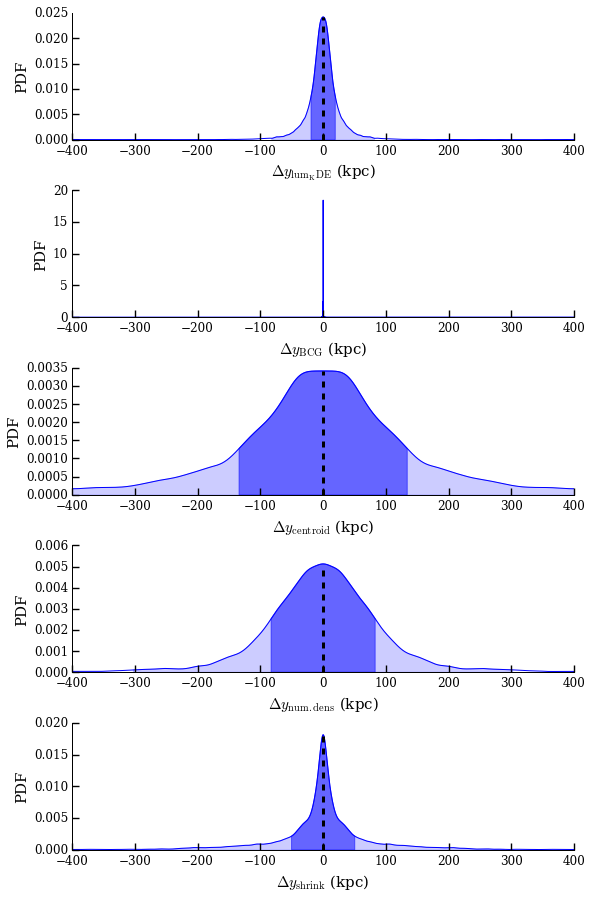

In [144]:
mbp_sum_stat = plotclst.plot_offset_along_1_dimension(
    mbp_df, one_D_stat_keys)

In [155]:
def str_formatter(float_str):
    return "{0:.0f}".format(float_str)

In [165]:
mbp_sum_stat_df = pd.DataFrame(mbp_sum_stat).transpose()

In [168]:
mbp_sum_stat_df.columns = [
    u'location', 
    u'lower 68\%', 
    u'lower 95\%', 
    u'lower 99\%', 
    u'upper 68\%', 
    u'upper 95\%', 
    u'upper 99\%']

In [163]:
from collections import OrderedDict
one_d_offset_key_map = OrderedDict([
    ("BCG_y", r"$\Delta y_{\rm BCG}$"),
    ("centroid_y", r"$\Delta y_{\rm centroid}'$"),
    ("lum_KDE_y", r"$\Delta y_{\rm KDE}'$"),
    ("no_dens_y", r"$\Delta y_{\rm num.dens}$"),
    ("shrink_cent_y", r"$\Delta y_{\rm shrink}'$")]
    )

In [166]:
mbp_sum_stat_df.index = [
    one_d_offset_key_map[k] for k in mbp_sum_stat_df.index]

In [171]:
with open("../../paper/most_bound_particle_table.tex", 'w') as f:
    f.write(mbp_sum_stat_df.to_latex(float_format=str_formatter, escape=False))

In [172]:
!cat ../../paper/most_bound_particle_table.tex

\begin{tabular}{lrrrrrrr}
\toprule
{} &  location &  lower 68\% &  lower 95\% &  lower 99\% &  upper 68\% &  upper 95\% &  upper 99\% \\
\midrule
$\Delta y_{\rm BCG}$       &       nan &           0 &          -0 &        -252 &          -0 &         528 &        1107 \\
$\Delta y_{\rm centroid}'$ &        -0 &        -134 &        -491 &       -1176 &         134 &         491 &        1176 \\
$\Delta y_{\rm KDE}'$      &        -0 &         -19 &         -82 &       -1182 &          19 &          82 &        1182 \\
$\Delta y_{\rm num.dens}$  &        -0 &         -83 &        -302 &       -1114 &          83 &         302 &        1114 \\
$\Delta y_{\rm shrink}'$   &         0 &         -50 &        -288 &       -1025 &          50 &         288 &        1025 \\
\bottomrule
\end{tabular}
